In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
#remove missing values
df.dropna(axis = 0,inplace = True)
df

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [6]:
#drop duplicate values
df.drop_duplicates(inplace = True)

In [7]:
#remove blank values
df = df[~(df['clean_comment'].str.strip() == '')]

In [10]:
#practice
'  Hello I am Raj  '.lower()
'  Hello I am Raj  '.strip()

'Hello I am Raj'

In [18]:
def preprocess_data(comment):

    #lowering the comment
    comment = comment.lower()

    #stripping the comment
    comment = comment.strip()

    #removal of new line character
    comment = re.sub('\n','',comment)

    #removal of special character
    comment = re.sub(r'[^A-Za-z0-9\s!?.]','', comment)

    #removal of stopwords
    stop_words = set(stopwords.words('english')) - {'no','not','but'}
    comment = ' '.join([word for word in comment.split() if word not in stop_words])

    #lemmatizing of words
    lemmatizer = WordNetLemmatizer()
    comment = ' '.join([lemmatizer.lemmatize(word) for word in comment.split()])

    return comment




    

In [19]:
df['cleaned_comment'] = df['clean_comment'].apply(preprocess_data)

C:\Users\Personal PC\AppData\Local\Temp\ipykernel_12872\2307687574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_comment'] = df['clean_comment'].apply(preprocess_data)


In [21]:
df.drop('clean_comment',axis = 1,inplace = True)

C:\Users\Personal PC\AppData\Local\Temp\ipykernel_12872\613658939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('clean_comment',axis = 1,inplace = True)


In [22]:
df.head()

,category,cleaned_comment
0,1,family mormon never tried explain still stare ...
1,1,buddhism much lot compatible christianity espe...
2,-1,seriously say thing first get complex explain ...
3,0,learned want teach different focus goal not wr...
4,1,benefit may want read living buddha living chr...


In [26]:
#import the required packages required for model building
import mlflow
import dvc
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [28]:
#vectorize the comments using bag of words
vectorizer = CountVectorizer(max_features = 1000)

In [31]:
X = vectorizer.fit_transform(df['cleaned_comment']).toarray()
y = df['category']


In [ ]:
#split the datsets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
!pip install dagshub

In [55]:
#set the experiment
# mlflow.set_tracking_uri('https://dagshub.com/raj-coding1/youtube-comment-analysis.mlflow')
import dagshub
mlflow.set_tracking_uri('https://dagshub.com/raj-coding1/youtube-comment-analysis.mlflow')
dagshub.init(repo_owner='raj-coding1', repo_name='youtube-comment-analysis', mlflow=True)

mlflow.set_experiment('RF_Baseline_CV_Model')

Accessing as raj-coding1

Initialized MLflow to track repo "raj-coding1/youtube-comment-analysis"

Repository raj-coding1/youtube-comment-analysis initialized!

2025/11/29 19:16:12 INFO mlflow.tracking.fluent: Experiment with name 'RF_Baseline_CV_Model' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/5c13a2f7bbdd4d2781c91cea719434c0', creation_time=1764423973305, experiment_id='1', last_update_time=1764423973305, lifecycle_stage='active', name='RF_Baseline_CV_Model', tags={}>

🏃 View run learned-sheep-852 at: https://dagshub.com/raj-coding1/youtube-comment-analysis.mlflow/#/experiments/1/runs/58cafcc7dab34215b758f0e9f2ce7ff5
🧪 View experiment at: https://dagshub.com/raj-coding1/youtube-comment-analysis.mlflow/#/experiments/1
accuracy : 0.6295692349504008


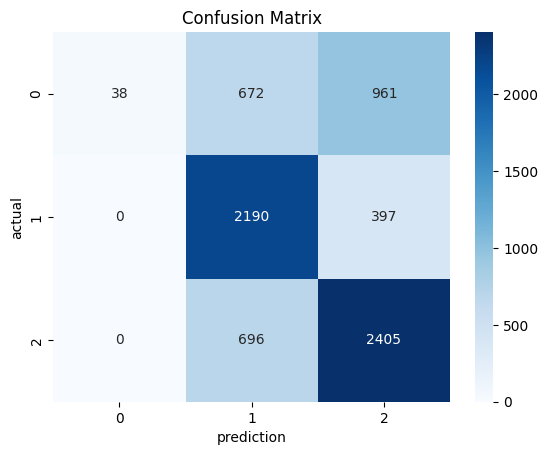

In [57]:

with mlflow.start_run():
    mlflow.set_tag('mlflow.set_runname','RF_Baseline_Train_test')
    mlflow.set_tag('experiment','Baseline')
    mlflow.set_tag('model','RandomForest')
    mlflow.set_tag('description','It is the baseline model with RandomForest algorithm, CountVectorizer ')

    mlflow.log_param('vectorizer','CountVectorizer')
    mlflow.log_param('max_features',vectorizer.max_features)

    n_estimator = 100
    max_depth = 10

    mlflow.log_param('n_estimator', n_estimator)
    mlflow.log_param('max_depth', max_depth)

    model = RandomForestClassifier(n_estimators = n_estimator, max_depth = max_depth, random_state = 42)
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    
    mlflow.log_param('accuracy', accuracy)

    classification_rep = classification_report(y_test, y_test, output_dict = True)
    for label,info in classification_rep.items():
        if isinstance(info, dict):
            for metric,value in info.items():
                mlflow.log_metric(f'{label}_{metric}', value)
    
    conf_matrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(conf_matrix, annot =True, fmt = 'd', cmap= 'Blues')
    plt.xlabel('prediction')
    plt.ylabel('actual')
    plt.title('Confusion Matrix')
    # plt.show()

    plt.savefig('data/ConfusinMatrix.png')
    mlflow.log_artifact('data/ConfusinMatrix.png')
    df.to_csv('data/df.csv',index= False)
    mlflow.log_artifact('data/df.csv')

print(f'accuracy : {accuracy}')
